## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.734825  0.698726  1.537832 -1.513118  0.895499  0.184909
1  0.682121 -1.516477  1.409314  0.874939  0.714930  0.430966
2  0.111065 -0.671168  0.502314  0.927497 -1.391946 -0.121857
3 -1.397971  1.216167 -0.235990 -0.637101  1.262814 -1.135905
4  0.521028  1.602170  0.460010  1.084518 -1.411011  0.719723


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9369391	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.9265820	total: 69ms	remaining: 34.4s
2:	learn: 0.9170917	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9074777	total: 70.5ms	remaining: 17.5s
4:	learn: 0.8999295	total: 71ms	remaining: 14.1s
5:	learn: 0.8909666	total: 71.6ms	remaining: 11.9s
6:	learn: 0.8825602	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8740250	total: 72.8ms	remaining: 9.03s
8:	learn: 0.8653789	total: 73.3ms	remaining: 8.07s
9:	learn: 0.8558578	total: 73.8ms	remaining: 7.3s
10:	learn: 0.8484260	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8398695	total: 74.8ms	remaining: 6.15s
12:	learn: 0.8321055	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8249479	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8183623	total: 76.3ms	remaining: 5.01s
15:	learn: 0.8117783	total: 76.8ms	remaining: 4.72s
16:	learn: 0.8042565	total: 77.3ms	remaining: 4.47s
17:	learn: 0.7970775	total: 77.8ms	remaining: 4.24s
18:	learn: 0.7889398	total: 78.2ms	remaining: 4.0

86:	learn: 0.4462687	total: 109ms	remaining: 1.15s
87:	learn: 0.4432401	total: 110ms	remaining: 1.14s
88:	learn: 0.4394116	total: 110ms	remaining: 1.13s
89:	learn: 0.4365622	total: 111ms	remaining: 1.12s
90:	learn: 0.4326475	total: 111ms	remaining: 1.11s
91:	learn: 0.4295662	total: 112ms	remaining: 1.1s
92:	learn: 0.4258499	total: 112ms	remaining: 1.09s
93:	learn: 0.4225321	total: 113ms	remaining: 1.09s
94:	learn: 0.4190264	total: 113ms	remaining: 1.08s
95:	learn: 0.4156962	total: 114ms	remaining: 1.07s
96:	learn: 0.4121902	total: 114ms	remaining: 1.06s
97:	learn: 0.4095208	total: 114ms	remaining: 1.05s
98:	learn: 0.4067320	total: 115ms	remaining: 1.04s
99:	learn: 0.4036521	total: 115ms	remaining: 1.04s
100:	learn: 0.4009164	total: 116ms	remaining: 1.03s
101:	learn: 0.3987511	total: 116ms	remaining: 1.02s
102:	learn: 0.3955986	total: 117ms	remaining: 1.02s
103:	learn: 0.3923566	total: 117ms	remaining: 1.01s
104:	learn: 0.3897984	total: 118ms	remaining: 1s
105:	learn: 0.3872024	total: 1

255:	learn: 0.1451071	total: 188ms	remaining: 545ms
256:	learn: 0.1439736	total: 188ms	remaining: 544ms
257:	learn: 0.1429718	total: 189ms	remaining: 542ms
258:	learn: 0.1421576	total: 189ms	remaining: 541ms
259:	learn: 0.1413634	total: 190ms	remaining: 540ms
260:	learn: 0.1404882	total: 190ms	remaining: 538ms
261:	learn: 0.1397602	total: 191ms	remaining: 537ms
262:	learn: 0.1386966	total: 191ms	remaining: 535ms
263:	learn: 0.1380257	total: 191ms	remaining: 534ms
264:	learn: 0.1370164	total: 192ms	remaining: 532ms
265:	learn: 0.1361268	total: 192ms	remaining: 531ms
266:	learn: 0.1352972	total: 193ms	remaining: 529ms
267:	learn: 0.1344509	total: 193ms	remaining: 528ms
268:	learn: 0.1337809	total: 194ms	remaining: 527ms
269:	learn: 0.1329836	total: 194ms	remaining: 526ms
270:	learn: 0.1319869	total: 195ms	remaining: 524ms
271:	learn: 0.1310663	total: 195ms	remaining: 523ms
272:	learn: 0.1303791	total: 196ms	remaining: 522ms
273:	learn: 0.1294197	total: 196ms	remaining: 520ms
274:	learn: 

477:	learn: 0.0426169	total: 293ms	remaining: 320ms
478:	learn: 0.0424114	total: 294ms	remaining: 320ms
479:	learn: 0.0422084	total: 294ms	remaining: 319ms
480:	learn: 0.0420515	total: 295ms	remaining: 318ms
481:	learn: 0.0419735	total: 295ms	remaining: 317ms
482:	learn: 0.0418190	total: 295ms	remaining: 316ms
483:	learn: 0.0416183	total: 296ms	remaining: 315ms
484:	learn: 0.0414682	total: 296ms	remaining: 314ms
485:	learn: 0.0413917	total: 297ms	remaining: 314ms
486:	learn: 0.0411825	total: 297ms	remaining: 313ms
487:	learn: 0.0410368	total: 298ms	remaining: 312ms
488:	learn: 0.0408931	total: 299ms	remaining: 312ms
489:	learn: 0.0408236	total: 299ms	remaining: 311ms
490:	learn: 0.0406429	total: 299ms	remaining: 310ms
491:	learn: 0.0405743	total: 300ms	remaining: 310ms
492:	learn: 0.0403763	total: 300ms	remaining: 309ms
493:	learn: 0.0403088	total: 301ms	remaining: 308ms
494:	learn: 0.0401342	total: 301ms	remaining: 308ms
495:	learn: 0.0399992	total: 302ms	remaining: 307ms
496:	learn: 

639:	learn: 0.0224278	total: 371ms	remaining: 209ms
640:	learn: 0.0223188	total: 372ms	remaining: 208ms
641:	learn: 0.0222547	total: 372ms	remaining: 208ms
642:	learn: 0.0221792	total: 373ms	remaining: 207ms
643:	learn: 0.0220730	total: 374ms	remaining: 207ms
644:	learn: 0.0220085	total: 374ms	remaining: 206ms
645:	learn: 0.0219477	total: 375ms	remaining: 205ms
646:	learn: 0.0218858	total: 375ms	remaining: 205ms
647:	learn: 0.0218266	total: 376ms	remaining: 204ms
648:	learn: 0.0217383	total: 377ms	remaining: 204ms
649:	learn: 0.0216433	total: 377ms	remaining: 203ms
650:	learn: 0.0215811	total: 378ms	remaining: 202ms
651:	learn: 0.0214777	total: 378ms	remaining: 202ms
652:	learn: 0.0214417	total: 379ms	remaining: 201ms
653:	learn: 0.0213805	total: 379ms	remaining: 201ms
654:	learn: 0.0212896	total: 380ms	remaining: 200ms
655:	learn: 0.0212296	total: 380ms	remaining: 199ms
656:	learn: 0.0211704	total: 381ms	remaining: 199ms
657:	learn: 0.0210711	total: 381ms	remaining: 198ms
658:	learn: 

857:	learn: 0.0098511	total: 477ms	remaining: 79ms
858:	learn: 0.0098146	total: 478ms	remaining: 78.4ms
859:	learn: 0.0097708	total: 478ms	remaining: 77.8ms
860:	learn: 0.0097531	total: 479ms	remaining: 77.3ms
861:	learn: 0.0097154	total: 479ms	remaining: 76.7ms
862:	learn: 0.0096980	total: 479ms	remaining: 76.1ms
863:	learn: 0.0096559	total: 480ms	remaining: 75.5ms
864:	learn: 0.0096142	total: 480ms	remaining: 74.9ms
865:	learn: 0.0095945	total: 481ms	remaining: 74.4ms
866:	learn: 0.0095798	total: 481ms	remaining: 73.8ms
867:	learn: 0.0095506	total: 481ms	remaining: 73.2ms
868:	learn: 0.0095099	total: 482ms	remaining: 72.6ms
869:	learn: 0.0094907	total: 482ms	remaining: 72.1ms
870:	learn: 0.0094764	total: 483ms	remaining: 71.5ms
871:	learn: 0.0094385	total: 483ms	remaining: 70.9ms
872:	learn: 0.0093912	total: 483ms	remaining: 70.3ms
873:	learn: 0.0093753	total: 484ms	remaining: 69.7ms
874:	learn: 0.0093362	total: 484ms	remaining: 69.2ms
875:	learn: 0.0093083	total: 485ms	remaining: 68

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

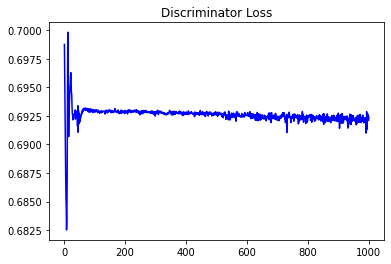

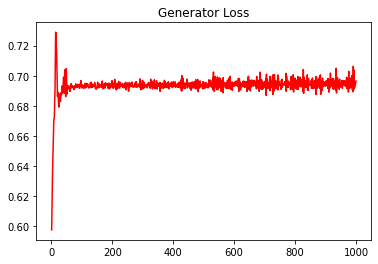

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.37965591818850686


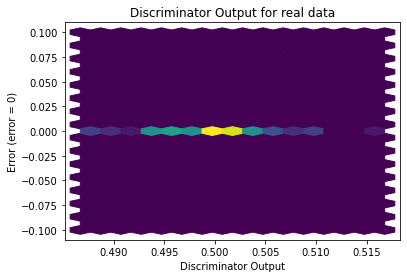

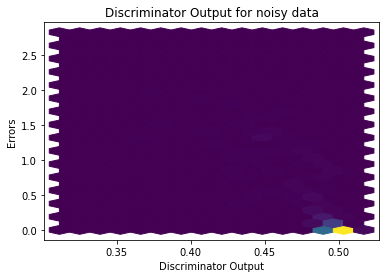

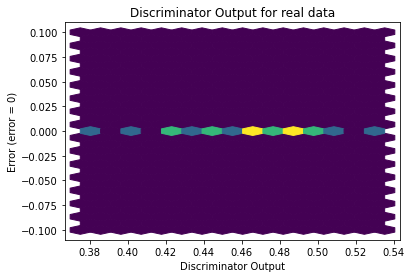

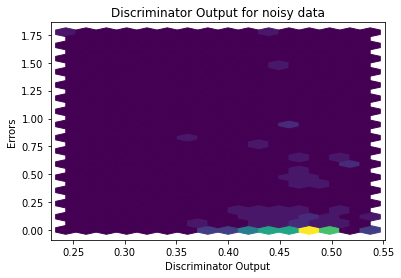

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


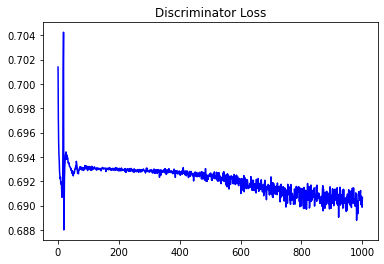

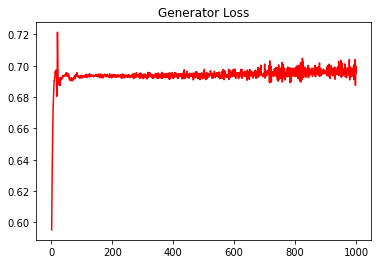

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3001608203605124


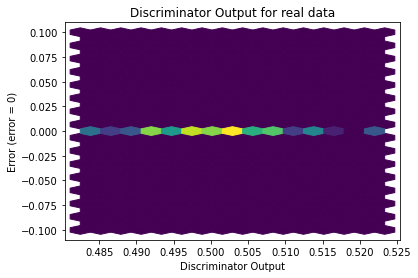

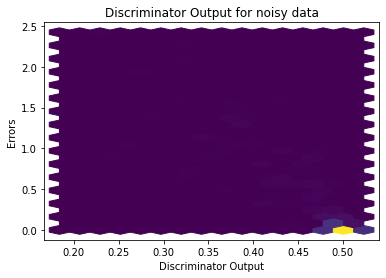

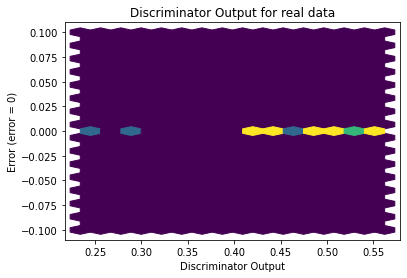

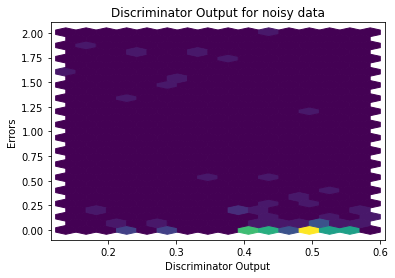

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0667]], requires_grad=True)
